# Case Study: Kids First

The Kids First Data Resource Center [https://doi.org/10.1093/neuonc/noaa222.200] tracks samples from pediatric research, including childhood cancers and structural birth defects. A single study with 1765 patients, 2281 specimens, 664 Observations and 38394 DocumentReferences are included.  The DocumentReference url field contains DRS url values.


In [1]:
!ls -l ./kids_first/SD_8Y99QZJJ


total 12436
-rw-rw-r-- 1 jupyter users 12062170 Jun 27 19:41 DocumentReference.ndjson
-rw-rw-r-- 1 jupyter users    72459 Jun 27 19:41 Observation.ndjson
-rw-rw-r-- 1 jupyter users    71041 Jun 27 19:41 Patient.ndjson
-rw-rw-r-- 1 jupyter users      720 Jun 27 19:41 ResearchStudy.ndjson
-rw-rw-r-- 1 jupyter users    48537 Jun 27 19:41 ResearchSubject.ndjson
-rw-rw-r-- 1 jupyter users   468621 Jun 27 19:41 Specimen.ndjson


In [2]:
import sys
# add git repo to our path (TODO - eliminate this step if we create a fhir-workshop package)
sys.path.append('./fhir-workshop')


In [3]:
from fhir_workshop.graph import load_graph, draw_graph, summarize_graph, find_by_resource_type, find_nearest
import fhir_workshop.manifests as manifests
import os
import pandas as pd 
from flatten_json import flatten



## Load the data


> In lieu of accessing a 'live' fhir service, we've pre-fetched some data


> The `load_graph` function loads the file paths into fhir resources and creates linkages between them, effectively simulating links the fhir server would normally provide
 

In [4]:
from glob import glob
kf_file_paths = glob('./kids_first/SD_8Y99QZJJ/*.ndjson')

In [5]:
graph = load_graph('kf', kf_file_paths, expected_resource_count=8481, check_edges=True)
'loaded'

'loaded'

### Draw a summary graph

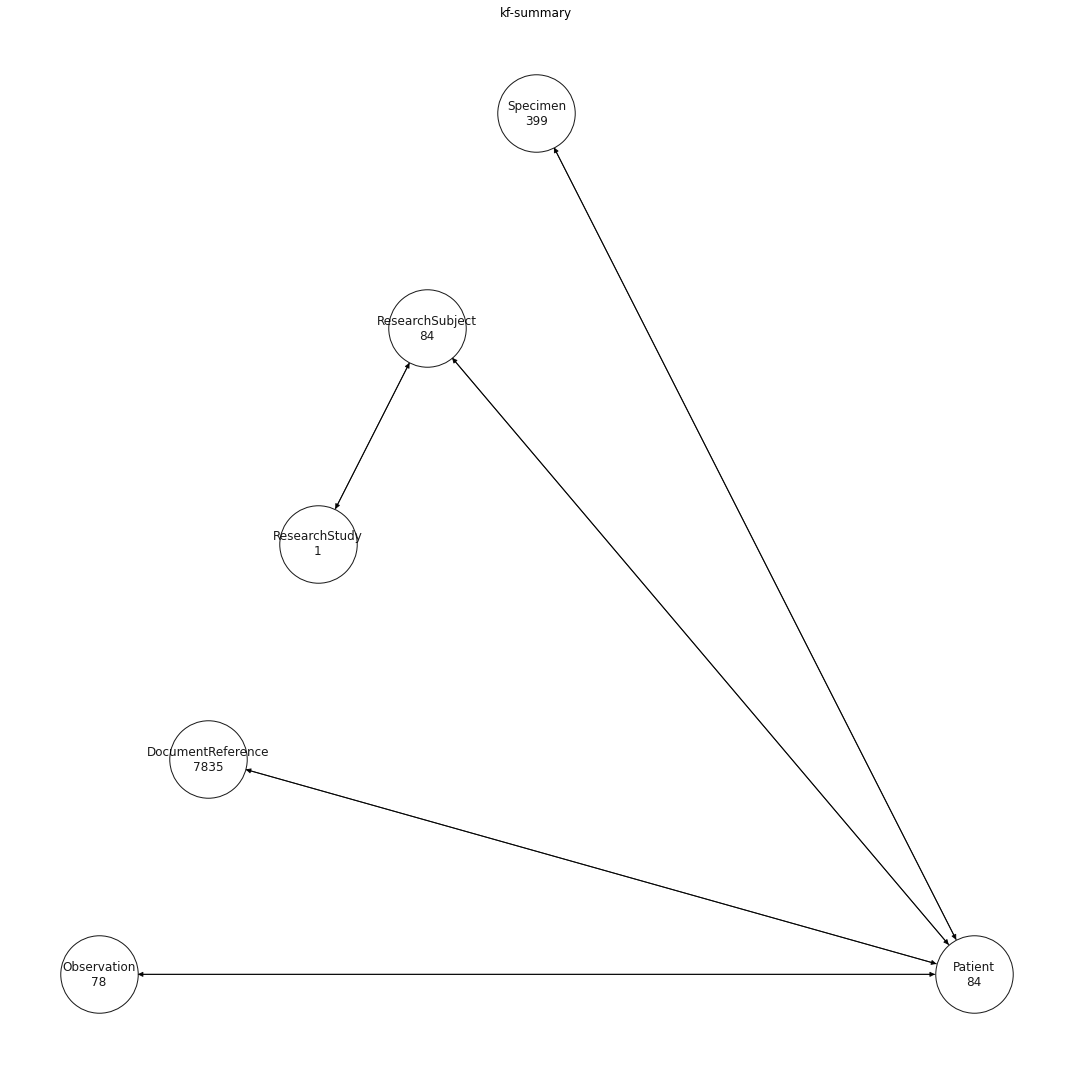

In [6]:
summary_graph = summarize_graph(graph)
path = os.path.join('/tmp/', 'kf-summary.png')
draw_graph(summary_graph, path=path)

### Retrieve all Patients

In [7]:
# "retrieve" the patients
patients = find_by_resource_type(graph, 'Patient')
# count the tuples that returned
assert len(patients) == 84, "should have 1131 patients"
# get the FHIR resource
patients = [dict_['resource'] for id_, dict_ in patients]


### Show details

In [8]:
pd.DataFrame([flatten(patient.as_json()) for patient in patients] )

,id,meta_versionId,meta_lastUpdated,meta_source,meta_profile_0,meta_tag_0_code,extension_0_extension_0_url,extension_0_extension_0_valueString,extension_0_extension_1_url,extension_0_extension_1_valueCoding_system,...,identifier_1_system,identifier_1_value,identifier_2_system,identifier_2_value,gender,resourceType,extension_1_extension_1_url,extension_1_extension_1_valueCoding_system,extension_1_extension_1_valueCoding_code,extension_1_extension_1_valueCoding_display
0,687103,1,2022-01-18T22:57:54.437+00:00,#5EE6nnJHIfhzaRAZ,http://hl7.org/fhir/StructureDefinition/Patient,SD_8Y99QZJJ,text,White,ombCategory,urn:oid:2.16.840.1.113883.6.238,...,https://kf-api-dataservice.kidsfirstdrc.org/pa...,PT_GBCZ0RW3,urn:kids-first:unique-string,Patient-SD_8Y99QZJJ-PT_GBCZ0RW3,female,Patient,NaN,NaN,NaN,NaN
1,48599,2,2021-11-16T08:30:46.609+00:00,#kEMsN3XEYMkQ0qUm,http://hl7.org/fhir/StructureDefinition/Patient,SD_8Y99QZJJ,text,Not Reported,NaN,NaN,...,https://kf-api-dataservice.kidsfirstdrc.org/pa...,PT_WGVEF96B,urn:kids-first:unique-string,Patient-SD_8Y99QZJJ-PT_WGVEF96B,unknown,Patient,NaN,NaN,NaN,NaN
2,48594,2,2021-11-16T08:30:46.891+00:00,#34x7QvjIJOjBAmEN,http://hl7.org/fhir/StructureDefinition/Patient,SD_8Y99QZJJ,text,Not Reported,NaN,NaN,...,https://kf-api-dataservice.kidsfirstdrc.org/pa...,PT_VPEMAQBN,urn:kids-first:unique-string,Patient-SD_8Y99QZJJ-PT_VPEMAQBN,unknown,Patient,NaN,NaN,NaN,NaN
3,48602,2,2021-11-16T08:30:47.117+00:00,#mRhPrscqbIPc71Jw,http://hl7.org/fhir/StructureDefinition/Patient,SD_8Y99QZJJ,text,Other,NaN,NaN,...,https://kf-api-dataservice.kidsfirstdrc.org/pa...,PT_C802WXXM,urn:kids-first:unique-string,Patient-SD_8Y99QZJJ-PT_C802WXXM,male,Patient,NaN,NaN,NaN,NaN
4,48576,2,2021-11-16T08:30:47.351+00:00,#82MqSbiB2QGbrhb1,http://hl7.org/fhir/StructureDefinition/Patient,SD_8Y99QZJJ,text,Not Reported,NaN,NaN,...,https://kf-api-dataservice.kidsfirstdrc.org/pa...,PT_9GKVQ9QS,urn:kids-first:unique-string,Patient-SD_8Y99QZJJ-PT_9GKVQ9QS,unknown,Patient,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,48637,2,2021-11-16T08:30:48.158+00:00,#kzmgewQPaDi0aWBJ,http://hl7.org/fhir/StructureDefinition/Patient,SD_8Y99QZJJ,text,White,ombCategory,urn:oid:2.16.840.1.113883.6.238,...,https://kf-api-dataservice.kidsfirstdrc.org/pa...,PT_C71G98K3,urn:kids-first:unique-string,Patient-SD_8Y99QZJJ-PT_C71G98K3,male,Patient,ombCategory,urn:oid:2.16.840.1.113883.6.238,2186-5,Not Hispanic or Latino
80,48636,2,2021-11-16T08:30:48.410+00:00,#kaAqob8bJfYeOe8Y,http://hl7.org/fhir/StructureDefinition/Patient,SD_8Y99QZJJ,text,Reported Unknown,ombCategory,http://terminology.hl7.org/CodeSystem/v3-NullF...,...,https://kf-api-dataservice.kidsfirstdrc.org/pa...,PT_G395P98S,urn:kids-first:unique-string,Patient-SD_8Y99QZJJ-PT_G395P98S,male,Patient,ombCategory,urn:oid:2.16.840.1.113883.6.238,2186-5,Not Hispanic or Latino
81,48643,2,2021-11-16T08:30:48.575+00:00,#EKfKCIRAxnPa37zR,http://hl7.org/fhir/StructureDefinition/Patient,SD_8Y99QZJJ,text,Other,NaN,NaN,...,https://kf-api-dataservice.kidsfirstdrc.org/pa...,PT_G9A050X1,urn:kids-first:unique-string,Patient-SD_8Y99QZJJ-PT_G9A050X1,male,Patient,NaN,NaN,NaN,NaN
82,687104,1,2022-01-18T22:57:54.867+00:00,#ZDwCAPzS1c2k6p3F,http://hl7.org/fhir/StructureDefinition/Patient,SD_8Y99QZJJ,text,White,ombCategory,urn:oid:2.16.840.1.113883.6.238,...,https://kf-api-dataservice.kidsfirstdrc.org/pa...,PT_ZKQTJ7F7,urn:kids-first:unique-string,Patient-SD_8Y99QZJJ-PT_ZKQTJ7F7,male,Patient,ombCategory,urn:oid:2.16.840.1.113883.6.238,2186-5,Not Hispanic or Latino


### Show simplified details

> 1/3 the number of columns

In [9]:
pd.DataFrame([flatten(patient.as_simplified_json()[0]) for patient in patients] ).fillna('')

,id,meta_versionId,meta_lastUpdated,meta_source,meta_profile,meta_tag_,extension_us-core-race,extension_us-core-ethnicity,identifier_,identifier_https://kf-api-dataservice.kidsfirstdrc.org/participants/,identifier_urn:kids-first:unique-string,gender
0,687103,1,2022-01-18T22:57:54.437000+00:00,#5EE6nnJHIfhzaRAZ,http://hl7.org/fhir/StructureDefinition/Patient,SD_8Y99QZJJ,White|2106-3,Reported Unknown,C3507345,PT_GBCZ0RW3,Patient-SD_8Y99QZJJ-PT_GBCZ0RW3,female
1,48599,2,2021-11-16T08:30:46.609000+00:00,#kEMsN3XEYMkQ0qUm,http://hl7.org/fhir/StructureDefinition/Patient,SD_8Y99QZJJ,Not Reported,Not Reported,C3080043,PT_WGVEF96B,Patient-SD_8Y99QZJJ-PT_WGVEF96B,unknown
2,48594,2,2021-11-16T08:30:46.891000+00:00,#34x7QvjIJOjBAmEN,http://hl7.org/fhir/StructureDefinition/Patient,SD_8Y99QZJJ,Not Reported,Not Reported,C3078444,PT_VPEMAQBN,Patient-SD_8Y99QZJJ-PT_VPEMAQBN,unknown
3,48602,2,2021-11-16T08:30:47.117000+00:00,#mRhPrscqbIPc71Jw,http://hl7.org/fhir/StructureDefinition/Patient,SD_8Y99QZJJ,Other,Not Available,C3071187,PT_C802WXXM,Patient-SD_8Y99QZJJ-PT_C802WXXM,male
4,48576,2,2021-11-16T08:30:47.351000+00:00,#82MqSbiB2QGbrhb1,http://hl7.org/fhir/StructureDefinition/Patient,SD_8Y99QZJJ,Not Reported,Not Reported,C3078690,PT_9GKVQ9QS,Patient-SD_8Y99QZJJ-PT_9GKVQ9QS,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
79,48637,2,2021-11-16T08:30:48.158000+00:00,#kzmgewQPaDi0aWBJ,http://hl7.org/fhir/StructureDefinition/Patient,SD_8Y99QZJJ,White|2106-3,Not Hispanic or Latino|2186-5,C3172785,PT_C71G98K3,Patient-SD_8Y99QZJJ-PT_C71G98K3,male
80,48636,2,2021-11-16T08:30:48.410000+00:00,#kaAqob8bJfYeOe8Y,http://hl7.org/fhir/StructureDefinition/Patient,SD_8Y99QZJJ,Reported Unknown|UNK,Not Hispanic or Latino|2186-5,C3173646,PT_G395P98S,Patient-SD_8Y99QZJJ-PT_G395P98S,male
81,48643,2,2021-11-16T08:30:48.575000+00:00,#EKfKCIRAxnPa37zR,http://hl7.org/fhir/StructureDefinition/Patient,SD_8Y99QZJJ,Other,Not Available,C3064299,PT_G9A050X1,Patient-SD_8Y99QZJJ-PT_G9A050X1,male
82,687104,1,2022-01-18T22:57:54.867000+00:00,#ZDwCAPzS1c2k6p3F,http://hl7.org/fhir/StructureDefinition/Patient,SD_8Y99QZJJ,White|2106-3,Not Hispanic or Latino|2186-5,C3507222,PT_ZKQTJ7F7,Patient-SD_8Y99QZJJ-PT_ZKQTJ7F7,male


## Navigate using FHIR references

In [10]:
document_references = [dict_['resource'] for id_, dict_ in find_by_resource_type(graph, 'DocumentReference')]
patients = set([graph.nodes.get(document_reference.subject.reference)['resource'] for document_reference in document_references])
f"document_references: {len(document_references)} patients: {len(patients)}"

'document_references: 7835 patients: 77'

In [11]:

pd.DataFrame([
    {
        **{
            'subject': d.subject.reference,
            'type': document_references[0].type.text,
            'url': d.content[0].attachment.url,
            'security': d.securityLabel[0].coding[0].code,
            'format': d.content[1].format.display,
        }
        
    }
    for d in document_references if d.securityLabel and d.securityLabel[0].coding and d.securityLabel[0].coding[0].code == 'U'] 
)

,subject,type,url,security,format
0,Patient/48583,Variant Calls Index,drs://data.kidsfirstdrc.org/e1875ae7-33b4-4129...,U,tbi
1,Patient/48583,Variant Calls Index,drs://data.kidsfirstdrc.org/d2adbf71-52ea-4a35...,U,vcf
2,Patient/48577,Variant Calls Index,drs://data.kidsfirstdrc.org/872958dd-94a4-4833...,U,txt
3,Patient/48583,Variant Calls Index,drs://data.kidsfirstdrc.org/11f39ca3-9b12-4a41...,U,tbi
4,Patient/48577,Variant Calls Index,drs://data.kidsfirstdrc.org/a17c4fb8-664a-4a7f...,U,maf
...,...,...,...,...,...
3029,Patient/48644,Variant Calls Index,drs://data.kidsfirstdrc.org/c5b080b2-4865-4177...,U,maf
3030,Patient/48644,Variant Calls Index,drs://data.kidsfirstdrc.org/a3d6c545-db0d-4d49...,U,tbi
3031,Patient/48653,Variant Calls Index,drs://data.kidsfirstdrc.org/393a9282-6945-4ffd...,U,tsv
3032,Patient/48653,Variant Calls Index,drs://data.kidsfirstdrc.org/2224e522-efaf-4c0d...,U,png


In [12]:

observations = [dict_['resource'] for id_, dict_ in find_by_resource_type(graph, 'Observation')]

records = []

for o in observations:
    attributes = {
            'subject': o.subject.reference if o.subject else None,
            'specimen': o.specimen.reference if o.specimen else None,
            'code': o.code.text if o.code.text else o.code.coding[0].display,
            'valueQuantity': o.valueQuantity.value if o.valueQuantity else None,
            'valueQuantity_unit': o.valueQuantity.unit if o.valueQuantity else None,
            'valueCodeableConcept': o.valueCodeableConcept.coding[0].display if o.valueCodeableConcept else None
        }
    components = {}
    if o.component:
        components = {
            c.code.coding[0].display if c.code.coding[0].display else c.code.coding[0].code:
            c.valueCodeableConcept.coding[0].display if c.valueCodeableConcept.coding else c.valueCodeableConcept.text
            for c in o.component if c.valueCodeableConcept
        }        
    records.append({**attributes, **components})

pd.DataFrame(records).fillna('')

,subject,specimen,code,valueQuantity,valueQuantity_unit,valueCodeableConcept
0,Patient/48589,,Clinical status,,,Alive
1,Patient/48579,,Clinical status,,,Alive
2,Patient/48610,,Clinical status,,,Dead
3,Patient/48628,,Clinical status,,,Dead
4,Patient/48624,,Clinical status,,,Alive
...,...,...,...,...,...,...
73,Patient/48643,,Clinical status,,,Alive
74,Patient/48623,,Clinical status,,,Alive
75,Patient/48653,,Clinical status,,,Dead
76,Patient/48638,,Clinical status,,,Alive
